# TensorFlow Tutorial #01
## Simple Linear Model

This follows [Hvass's Tensorflow Tutorial](https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/01_Simple_Linear_Model.ipynb)
[toc]

In [0]:
# %matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

The difference between `from xx import yy` and `import xx.yy as xxyy`
```
from urllib import request
# access request directly.
mine = request()

import urllib.request
# used as urllib.request
mine = urllib.request()
```

`confusion_matrix` is definied as such that C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j. 

In [0]:
tf.__version__

'1.8.0'

## Load Data

Load MNIST sample data embedded in system. 

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

Ignore the warming message for now, and get the size of data to verify all data are loaded.

In [0]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


### Exam the Data and Understand their Meta Information
Printout some Test sample data.

In [0]:
data.test.images[0:0, :]

array([], shape=(0, 784), dtype=float32)

In [0]:
data.test.images[0:1, :]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [0]:
data.test.labels[0:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

### Get Results
We also need the classes as single numbers for various comparisons and performance measures, so we convert the One-Hot encoded vectors to a single number by taking the index of the highest element.

In [0]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [0]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4])

### Data Dimension


In [0]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

## Learn to Plot

import library first
1. Prepare data
2. Create plot
3. Plot
4. Customize plot
5. Save plot
6. Show plot

!!!Requires step-1 tp step-6 in one cell!!!

![cheat sheet - matplot](https://www.evernote.com/l/AS4i4sX2oBxOfI20WutXgbqwqoB-1Tum44sB/image.png)

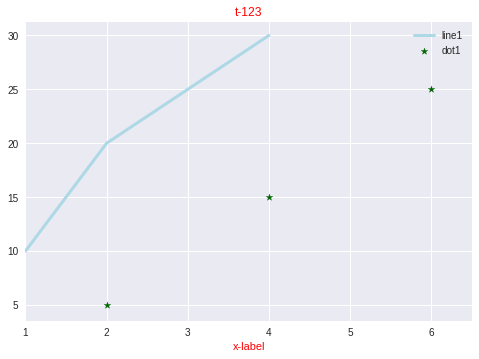

In [0]:
# Experiment, for tutorial see https://realpython.com/python-matplotlib-guide/
# from cheat sheet above
# step-1 Prepare data
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]
# step-2 Create plot, assign a name, make sure run import plot library first
fig = plt.figure()
# step-3 Plot 
ax = fig.add_subplot(111)

# add few extra, label
ax.plot(x, y, color='lightblue', label='line1', linewidth=3)


# step-4 Customize plot
ax.scatter([2, 4, 6], [5, 15, 25], color='darkgreen', label='dot1', marker='*')
ax.set_xlim(1, 6.5)

plt.legend()
plt.xlabel('x-label',color = 'red')
plt.title('t-123', color = 'r')


# step-5 Save plot
plt.savefig('foo.png')
# step-6 Show plot
# plt.show()

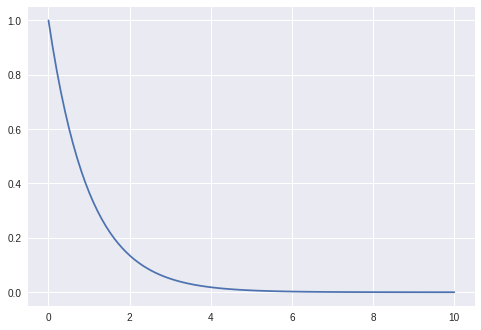

In [0]:
# from https://www.designnews.com/design-hardware-software/how-develop-ai-on-raspberry-pi-google-colaboratory/206379795358509

a = np.linspace(0, 10, 100)
b = np.exp(-a)
plt.plot(a, b)
plt.show()

## Help Function for Plotting Images
plot 3x3 images and write true and predicted number below.

In [0]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

## Plot few Images

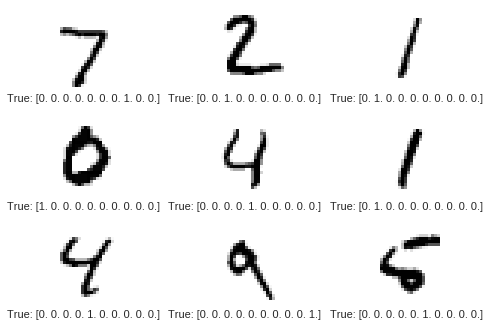

In [0]:
# Get first few images
images = data.test.images[0:9]
# Get true class of those images
cls_true = data.test.labels[0:9]
# plot
plot_images(images=images, cls_true=cls_true)

## Tensorflow Graph

A TensorFlow graph consists of the following parts which will be detailed below:

![nn model](https://www.evernote.com/l/AS5v1D2QyMdCIqKDJxrmTtJTFROXHaSFPFIB/image.png)

- Placeholder variables used to change the input to the graph. (X, Y, Label).
- Model variables that are going to be optimized so as to make the model perform better. (W, B)
- The model which is essentially just a mathematical function that calculates some output given the input in the placeholder variables and the model variables.(J)
- An optimization method which updates the variables of the model. (Optimizer)

### Placeholder

Placeholder variables serve as the input to the graph that we may change each time we execute the graph. We call this feeding the placeholder variables. We need3 placeholders:

- one for holding images, X.
- one for holding true value of image represents, Y, aka label.
- one for predicted value, Y_hat.
 
##### For X:

the data-type is set to float32, which can represent shade, and the shape is set to [None, img_size_flat], where None means not specified, that the tensor may hold an arbitrary number of images with each image being a vector of length img_size_flat. When we exam the data.test before, the data format is `array([], shape=(0, 784), dtype=float32)` and value is 

```
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0. ....]]) # with 28x28 elements in the array
```
So, it is an array, not a vector.


In [0]:
# img_size_flat = img_size * img_size 
x = tf.placeholder(tf.float32, [None, img_size_flat])


**For Y:**

Next we have the placeholder variable for the true labels associated with the images that were input in the placeholder variable x. The shape of this placeholder variable is [None, nu_classes] which means it may hold an arbitrary number of labels and each label is a vector of length num_classes which is 10 in this case.

`array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], [...], [ ]])`


In [0]:
y_true = tf.placeholder(tf.float32, [None, num_classes])

**For Prediction/Y_hat:** 

Finally we have the placeholder variable for the true class of each image in the placeholder variable x. These are integers and the dimensionality of this placeholder variable is set to [None] which means the placeholder variable is a one-dimensional vector of arbitrary length.

It is a vector.

In [0]:
y_true_cls = tf.placeholder(tf.int64, [None])